In [29]:
# Machine learning algo to identiy if a firm should be prioritized or not based on certain features for one year period
# The firms in the final priority list would be used for testing the model
# Three labels "error", "outlier" and "typical" are used to classify the firms
import numpy as np
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as Data
import matplotlib.pyplot as plt 
import pandas as pd
import statistics as st
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV, Lasso


In [30]:
# I would be calculating the zscore for all firms for one year period (2020)
# With the zscore I would be able to identify if a firm should be prioritized or not
# Selected metrics are made in excel file 
# firms with missing values for those features are filtered out in excel sheet
# Firms left without missing values are used for machine learning technique analysis

# Creating the dataset and cleaning it up
Raw = pd.read_excel(r'C:\Users\tobio\OneDrive\Bank of England\MachineL.xlsx', sheet_name='Machine Learning')
# adjusting the column names
Raw = Raw.drop(['Unnamed: 0'], axis=1) # drop the first column as the firm number has been seprated into another column inn excel sheet
Raw.columns = ["Firm","NWP", "SCR", "SCR coverage ratio", "GWP", "Assets", "Equity", "Gross Claims Incurred", "Net Combined ratio"]
# 96 frims in total


print(Raw)

    Firm           NWP           SCR  SCR coverage ratio           GWP  \
0      4  24996.021042  19600.262144            1.414507  34922.702554   
1      5     81.273653     66.230812            1.899498     83.668353   
2      6   3041.876078   3281.203179            1.398558   4452.508624   
3     10   7893.064120   2880.316429            1.421303   7923.371752   
4     14     11.852087      8.858272            2.778387     13.775816   
..   ...           ...           ...                 ...           ...   
92   316     -0.037675    225.332967            1.797814     -0.879752   
93   317   2150.070000    164.189033            1.353203   2150.070000   
94   321     24.632234    167.547783            1.697523     46.127035   
95   322   2029.697013   1395.278396            1.381756   2179.242094   
96   324     26.546638     30.191048            1.707757    147.947620   

           Assets        Equity  Gross Claims Incurred  Net Combined ratio  
0    94065.081033  22827.370034   

19396.340851777604
57216.33532155488
    Firm           NWP           SCR  SCR coverage ratio           GWP  \
0      4  24996.021042  19600.262144            1.414507  34922.702554   
1      5     81.273653     66.230812            1.899498     83.668353   
2      6   3041.876078   3281.203179            1.398558   4452.508624   
3     10   7893.064120   2880.316429            1.421303   7923.371752   
4     14     11.852087      8.858272            2.778387     13.775816   
..   ...           ...           ...                 ...           ...   
92   316     -0.037675    225.332967            1.797814     -0.879752   
93   317   2150.070000    164.189033            1.353203   2150.070000   
94   321     24.632234    167.547783            1.697523     46.127035   
95   322   2029.697013   1395.278396            1.381756   2179.242094   
96   324     26.546638     30.191048            1.707757    147.947620   

           Assets        Equity  Gross Claims Incurred  Net Combined ratio

C:\Users\tobio\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


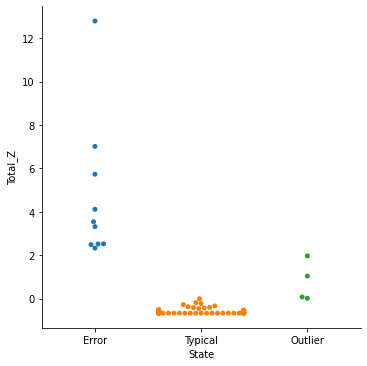

In [31]:
NWP_mean = st.mean(Raw['NWP'])
NWP_sd = st.stdev(Raw['NWP'])

Assets_mean = st.mean(Raw['Assets'])
Assets_sd = st.stdev(Raw['Assets'])
print(Assets_mean) # for validation in excel sheet
print(Assets_sd)

# creating a new dataframe and calculating the z-score to identify outliers both for NWP and Assets
Raw['NWP_Z'] = (Raw['NWP'] - NWP_mean)/NWP_sd
Raw['Assets_Z'] = (Raw['Assets'] - Assets_mean)/Assets_sd

Raw["Total_Z"] = Raw["NWP_Z"] + Raw["Assets_Z"]
print(Raw)

# creeating a method for condition 
def condition(row):
    if row["Total_Z"] >= 2:
        return "Error"
    elif row["Total_Z"] < 2:
        if row["Total_Z"] > 0:
            return "Outlier"
        else:
            return "Typical"
Raw["State"] = Raw.apply(condition, axis=1)
print(Raw)
# catplot plotting according to state
sns.catplot(x="State", y="Total_Z", data=Raw, kind="swarm")
plt.show()
#sns.catplot(x="Firm", y="Total_Z", data=Raw, hue="State", kind="swarm", height=10)
# The firms in yellow which represent firms with typical values are: the firms which should be prioritized when taking the year 2020 into account 

In [32]:
# Exporting the raw dataframe containing firm states to csv file
Raw.to_csv(r'C:\Users\tobio\OneDrive\Bank of England\MLData.csv', index=False)
# CSV is then converted to excel file

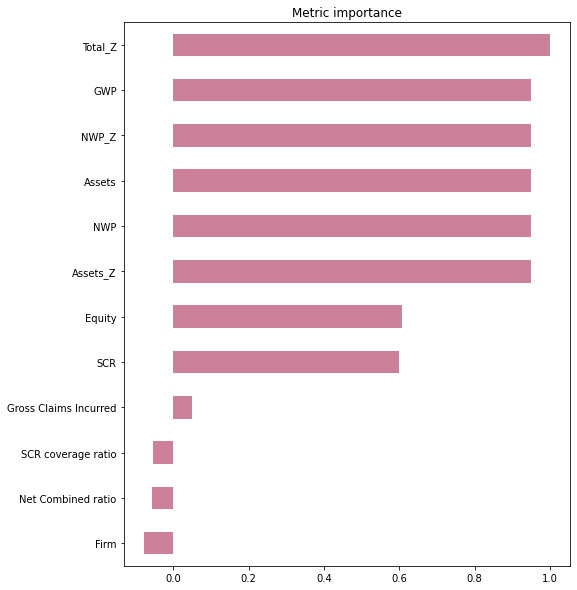

In [33]:
# machine learning Feature selection technique to show correlation between the metrics
# Pearson correlation is used (meausures linear relationship between two variables)
# The correlation is performed against the total z score as that is a direct indidcator of the state of the firm (outlier, typical or error)
Metrics = Raw.corr()["Total_Z"]
plt.rcParams['figure.figsize'] = (8, 10)
imp_Metrics = Metrics.sort_values()
imp_Metrics.plot(kind="barh", title="Metric importance", color=[(0.8, 0.5, 0.6)])
plt.show()

# From the chart below, NWP, GWP, Assets, Equity, and SCR are strong metrics in determining the priority of a firm

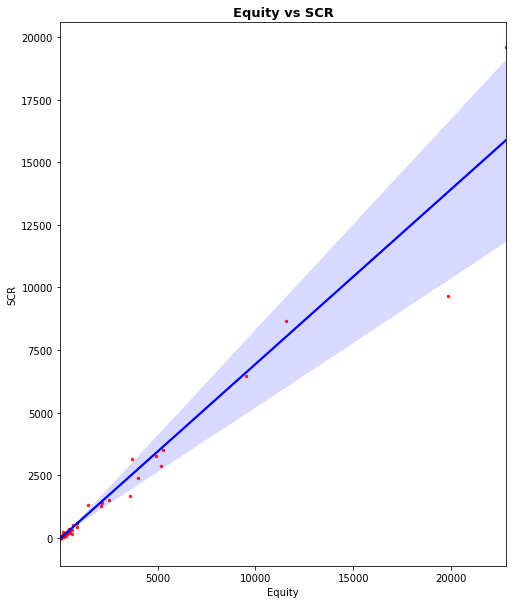

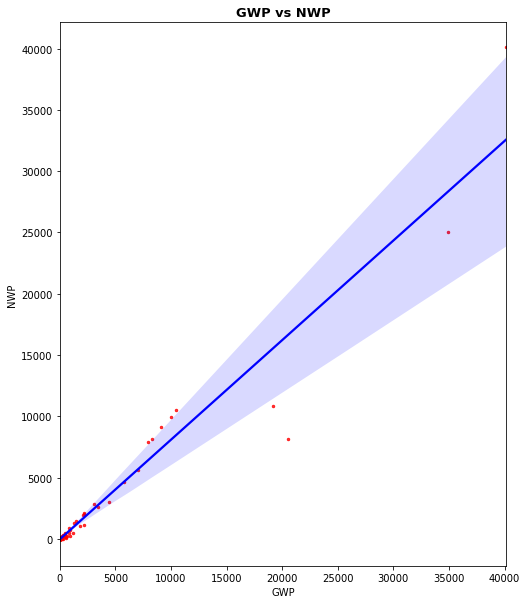

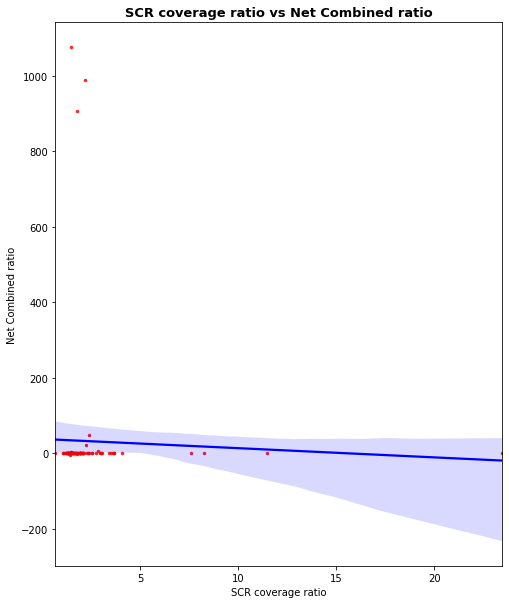

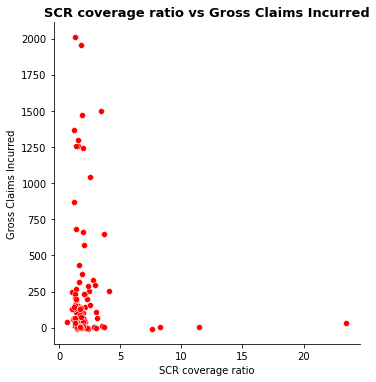

Text(0.5, 1.0, 'Assets vs Total_Z')

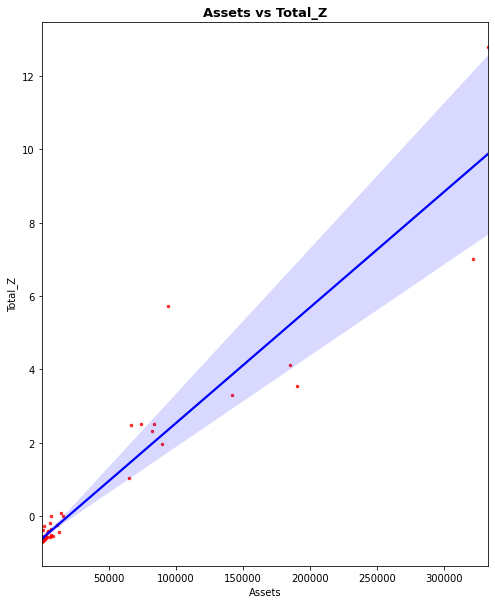

In [36]:
# performing a regression plot between equity and SCR  
sns.regplot(x="Equity", y="SCR", data=Raw,  color="red", scatter_kws={"s": 6}, line_kws={"color": "blue"})
plt.title("Equity vs SCR", fontsize=13, fontweight="bold")
plt.show()

# performing a regression plot between GWP and NWP
sns.regplot(x="GWP", y="NWP", data=Raw,  color="red", scatter_kws={"s": 6}, line_kws={"color": "blue"}, label="GWP vs NWP") 
plt.title("GWP vs NWP", fontsize=13, fontweight="bold")
plt.show()

# performing a regression plot between SCR coverage ratio and net combined ratio
sns.regplot(x="SCR coverage ratio", y="Net Combined ratio", data=Raw,  color="red", scatter_kws={"s": 6}, line_kws={"color": "blue"}, label="SCR coverage ratio vs Net Combined ratio")
plt.title("SCR coverage ratio vs Net Combined ratio", fontsize=13, fontweight="bold")
plt.show()

# performing a regression plot between SCR Coverage ratio and Gross Claims Incurred
sns.relplot(x="SCR coverage ratio", y="Gross Claims Incurred", data=Raw,  color="red", label="SCR coverage ratio vs Gross Claims Incurred")
plt.title("SCR coverage ratio vs Gross Claims Incurred", fontsize=13, fontweight="bold")
plt.show()

# performing a regression plot between Assets and Total Z
sns.regplot(x="Assets", y="Total_Z", data=Raw, color="red", scatter_kws={"s": 6}, line_kws={"color": "blue"}, label="Assets vs Total_Z")
plt.title("Assets vs Total_Z", fontsize=13, fontweight="bold")

# plotting confusion matrix for the model
